## Final Project Submission

Please fill out:
* Student name: Brian Ayimba
* Student pace: self paced / part time / full  :full time
* Scheduled project review date/time: 
* Instructor name: Mwikali
* Blog post URL:


#Aviation Risk Analysis
#1.Business Understanding
Stakeholder

Head of the new Aviation Division

##Business Problem

The company plans to enter the aviation industry by purchasing and operating aircraft for commercial and private use. Aviation carries inherent safety and financial risks, and leadership needs data-driven guidance on which aircraft types present the lowest operational risk.

##Key Business Questions

Which aircraft categories have the lowest accident severity?

Which aircraft categories are involved in fewer accidents?

Which manufacturers demonstrate the strongest long-term safety record?

The objective is to minimize safety, insurance, and liability risk in early-stage investments.

#2. Data Understanding
Data Source:

National Transportation Safety Board (NTSB) Aviation Accident Dataset (1962–2023)

Description:

Each row represents an accident or incident and includes:

#Aircraft characteristics

#Injury severity

#Purpose of flight

#Date of occurrence

Preparation of Data

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading the data set

In [18]:
#Reading the main data frame using pandas
Aviation_Data = pd.read_csv('data/Aviation_Data.csv')
Aviation_Data .head()

c:\Users\brayo\anaconda\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [27]:
#inspection of data
Aviation_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [31]:
#filtering only the relevant columns for analysis
Relevant_Aviation_Data = Aviation_Data[[
'Event.Date',
'Aircraft.Category',
'Make',
'Model',
'Purpose.of.flight',
'Injury.Severity',
'Total.Fatal.Injuries',
'Total.Serious.Injuries',
'Total.Minor.Injuries'
]
]
Relevant_Aviation_Data

,Event.Date,Aircraft.Category,Make,Model,Purpose.of.flight,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
0,1948-10-24,NaN,Stinson,108-3,Personal,Fatal(2),2.0,0.0,0.0
1,1962-07-19,NaN,Piper,PA24-180,Personal,Fatal(4),4.0,0.0,0.0
2,1974-08-30,NaN,Cessna,172M,Personal,Fatal(3),3.0,NaN,NaN
3,1977-06-19,NaN,Rockwell,112,Personal,Fatal(2),2.0,0.0,0.0
4,1979-08-02,NaN,Cessna,501,Personal,Fatal(1),1.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...
90343,2022-12-26,NaN,PIPER,PA-28-151,Personal,Minor,0.0,1.0,0.0
90344,2022-12-26,NaN,BELLANCA,7ECA,NaN,NaN,0.0,0.0,0.0
90345,2022-12-26,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,Personal,Non-Fatal,0.0,0.0,0.0
90346,2022-12-26,NaN,CESSNA,210N,Personal,NaN,0.0,0.0,0.0


In [ ]:
#instead of using .loc I opted to convert the main data to the sliced one 
Aviation_Data=Relevant_Aviation_Data

In [34]:
Aviation_Data

,Event.Date,Aircraft.Category,Make,Model,Purpose.of.flight,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Event.Year
0,1948-10-24,NaN,Stinson,108-3,Personal,Fatal(2),2.0,0.0,0.0,1948.0
1,1962-07-19,NaN,Piper,PA24-180,Personal,Fatal(4),4.0,0.0,0.0,1962.0
2,1974-08-30,NaN,Cessna,172M,Personal,Fatal(3),3.0,NaN,NaN,1974.0
3,1977-06-19,NaN,Rockwell,112,Personal,Fatal(2),2.0,0.0,0.0,1977.0
4,1979-08-02,NaN,Cessna,501,Personal,Fatal(1),1.0,2.0,NaN,1979.0
...,...,...,...,...,...,...,...,...,...,...
90343,2022-12-26,NaN,PIPER,PA-28-151,Personal,Minor,0.0,1.0,0.0,2022.0
90344,2022-12-26,NaN,BELLANCA,7ECA,NaN,NaN,0.0,0.0,0.0,2022.0
90345,2022-12-26,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,Personal,Non-Fatal,0.0,0.0,0.0,2022.0
90346,2022-12-26,NaN,CESSNA,210N,Personal,NaN,0.0,0.0,0.0,2022.0


In [39]:
#dropping null values from the the highlighted columns
Aviation_Data = Aviation_Data.dropna(subset=['Aircraft.Category', 'Injury.Severity'])
Aviation_Data

,Event.Date,Aircraft.Category,Make,Model,Purpose.of.flight,Injury.Severity,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Event.Year
5,1979-09-17,Airplane,Mcdonnell Douglas,DC9,NaN,Non-Fatal,NaN,NaN,1.0,1979.0
7,1982-01-01,Airplane,Cessna,140,Personal,Non-Fatal,0.0,0.0,0.0,1982.0
8,1982-01-01,Airplane,Cessna,401B,Business,Non-Fatal,0.0,0.0,0.0,1982.0
12,1982-01-02,Airplane,Bellanca,17-30A,Personal,Non-Fatal,0.0,0.0,1.0,1982.0
13,1982-01-02,Airplane,Cessna,R172K,Personal,Fatal(1),1.0,0.0,0.0,1982.0
...,...,...,...,...,...,...,...,...,...,...
90328,2022-12-13,Airplane,PIPER,PA42,NaN,Non-Fatal,0.0,0.0,0.0,2022.0
90332,2022-12-14,Airplane,CIRRUS DESIGN CORP,SR22,Personal,Non-Fatal,0.0,0.0,0.0,2022.0
90335,2022-12-15,Airplane,SWEARINGEN,SA226TC,NaN,Non-Fatal,0.0,0.0,0.0,2022.0
90336,2022-12-16,Airplane,CESSNA,R172K,Personal,Minor,0.0,1.0,0.0,2022.0


Exloring accident frequency per aircraft type

In [41]:
category_counts = (
Aviation_Data.groupby('Aircraft.Category')
.size()
.sort_values(ascending=False)
)
category_counts

Aircraft.Category
Airplane             26803
Helicopter            3375
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 11
WSFT                     9
Powered-Lift             5
Blimp                    4
ULTR                     1
Rocket                   1
dtype: int64

fatality/extent of damage rating(rating how serious an accident is when it occurs)

In [43]:
Damage_extent_map = {
'Fatal': 3,
'Serious': 2,
'Minor': 1,
'None': 0
}


Aviation_Data['Severity.Score'] = Aviation_Data['Injury.Severity'].map(Damage_extent_map)
Damage_extent_map

{'Fatal': 3, 'Serious': 2, 'Minor': 1, 'None': 0}

In [44]:
Aviation_Data = Aviation_Data.dropna(subset=['Severity.Score'])

visualizing the data presented above

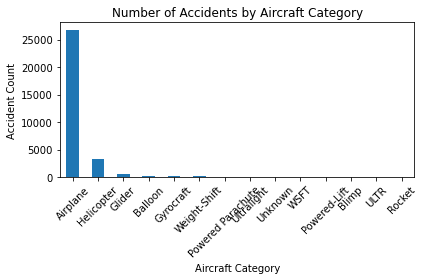

In [45]:
plt.figure()
category_counts.plot(kind='bar')
plt.title('Number of Accidents by Aircraft Category')
plt.xlabel('Aircraft Category')
plt.ylabel('Accident Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Taking the average severity by aircraft category

In [ ]:
category_severity = (
Aviation_Data.groupby('Aircraft.Category')['Severity.Score']
.mean()
.sort_values(ascending=False)
)
category_severity
#no visualization is needed as the figures in question are too close to eachother to have a meaningful visual

Aircraft.Category
Weight-Shift         3.000000
Unknown              3.000000
Ultralight           3.000000
Rocket               3.000000
Airplane             2.899117
Glider               2.879518
Helicopter           2.877524
Powered Parachute    2.866667
WSFT                 2.750000
Gyrocraft            2.743590
Balloon              2.714286
ULTR                 2.000000
Name: Severity.Score, dtype: float64

Getting the manufucturers who are the lowest risk


In [48]:
make_counts = Aviation_Data['Make'].value_counts()
reliable_makes = make_counts[make_counts >= 100].index


filtered_df = Aviation_Data[Aviation_Data['Make'].isin(reliable_makes)]

make_severity = (
filtered_df.groupby('Make')['Severity.Score']
.mean()
.sort_values()
.head(10)
)
make_severity

Make
CESSNA      2.860648
PIPER       2.902108
BELL        2.902299
ROBINSON    2.946667
BEECH       2.960000
Cessna      3.000000
Piper       3.000000
Name: Severity.Score, dtype: float64

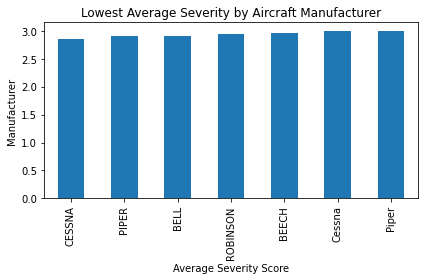

In [50]:
plt.figure()
make_severity.plot(kind='bar')
plt.title('Lowest Average Severity by Aircraft Manufacturer')
plt.xlabel('Average Severity Score')
plt.ylabel('Manufacturer')
plt.tight_layout()
plt.show()

 Conclusions and Business Recommendations
#Key Findings

Helicopters and experimental aircrafts show  greater severity 

commercial aircrafts with fixed wings show lower severity on average comparative to other aircraft categories

#Business Recommendations


It is highly advisable that we avoid helicopters and experimental aircrafts as they pose the highest severity risk.

Fixed wing commercial aircrafts are the safest and should be considered first when making a decision.

From the findings above, procurement should be done from manufacturers with long proven historical records